In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../code/")

import prob
import orbit

%matplotlib inline

In [2]:
# Constants in cgs
Msun = 1.989e33 
G = 6.674e-8
secday = 3600.0*24.0
secyer = 3600.0*24.0*365.25
AUincm = 1.496e13 
pcincm = 3.086e18

### Plotting script

In [3]:
def plot_pos(p, alpha=1.0):

    t_tmp = np.linspace(0.0, p[7], 100)

    ra, dec = orbit.get_ra_dec(p, t_tmp)
    plt.plot(ra*3600.0*1.0e3, dec*3600.0*1.0e3, alpha=alpha, color='k')
    
#     plt.xlim(-1.1*np.min(ra), 1.1*)
#     plt.ylim(-2, 2)
    plt.xlabel(r"$\Delta\ \alpha$ (mas)")
    plt.ylabel(r"$\Delta\ \delta$ (mas)")
    
    plt.axis('equal')

    plt.show()

### A star 1 pc away should have an orbital separation of 1"

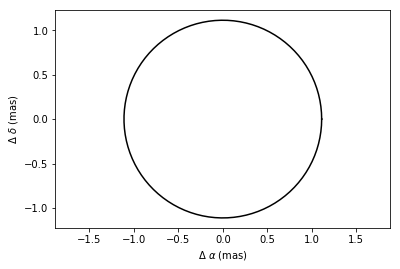

In [4]:
sys_ra = 0.0
sys_dec = 0.0
Omega = 0.0
omega = 0.0
I = 0.0
tau = 0.0
e = 0.0
P = 3600.0*24.0*365.25
gamma = 0.0
M1 = 5.5*Msun
M2 = 5.5*Msun
distance = 1.0e3


p = sys_ra, sys_dec, Omega, omega, I, tau, e, P, gamma, M1, M2, distance

plot_pos(p)

### Now, let's check for an orbit of a 6+4 Msun binary

In [4]:
data = np.genfromtxt("../data/Observed_RA_Dec_RV.txt")

names = ["time","ra","dec","ra_err","dec_err","rv","rv_err","plx","plx_err"]
obs_pos = np.recarray(len(data[:,0]), names=names, 
                      formats=['float64,float64,float64,float64,float64,float64,float64,float64,float64'])

obs_pos['time'] = data[:,0]  # in seconds
obs_pos['ra'] = data[:,1]/3600.0/1.0e3  # in degrees
obs_pos['dec'] = data[:,2]/3600.0/1.0e3  # in degrees
obs_pos['rv'] = data[:,3]/1.0e3  # in km/s

obs_pos['ra_err'] = data[:,4]/1.0e6 # in asec
obs_pos['dec_err'] = data[:,4]/1.0e6 # in asec
obs_pos['rv_err'] = 1.0

# parallax
obs_pos['plx'] = 1.0 / 10.423589 # distance is in kpc, plx in mas
obs_pos['plx_err'] = 0.3

In [24]:
sys_ra = 0.0
sys_dec = 0.0
Omega = 2.2832
omega = 4.1467 
I = 0.33837
tau = P/2.1
# tau = 0.33 + P/2.1
e = 0.11355
P = (10.0**0.551975)*3600.0*24.0*365.25
gamma = 0.0
M2 = 6.84055*Msun
M1 = 3.54515*Msun
distance = 10.4236e3

p = sys_ra, sys_dec, Omega, omega, I, tau, e, P, gamma, M1, M2, distance

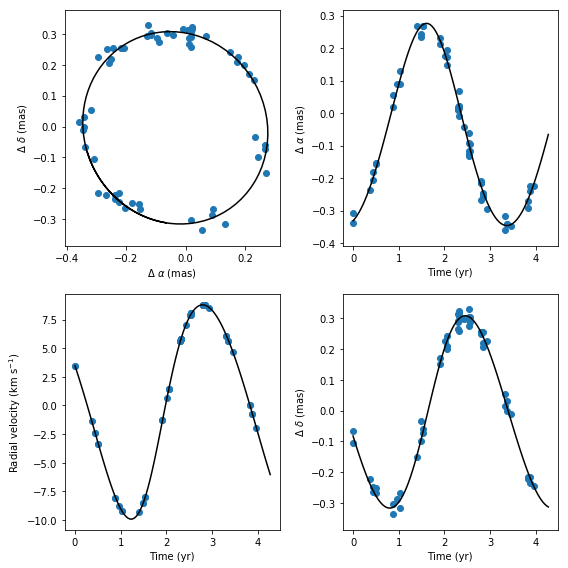

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(8,8))

ax[0,0].scatter(obs_pos['ra']*3600.0*1.0e3, obs_pos['dec']*3600.0*1.0e3)

t_tmp = np.linspace(0.0, 1.2*p[7], 100)
ra, dec = orbit.get_ra_dec(p, t_tmp)
ax[0,0].plot(ra*3600.0*1.0e3, dec*3600.0*1.0e3, color='k')

ax[0,0].set_xlabel(r"$\Delta\ \alpha$ (mas)")
ax[0,0].set_ylabel(r"$\Delta\ \delta$ (mas)")





ax[1,0].scatter(obs_pos['time']/secyer, obs_pos['rv'])

rv = orbit.get_RV(p, t_tmp)
ax[1,0].plot(t_tmp/secyer, rv, color='k')

ax[1,0].set_xlabel("Time (yr)")
ax[1,0].set_ylabel("Radial velocity (km s$^{-1}$)")



ax[0,1].scatter(obs_pos['time']/secyer, obs_pos['ra']*3600.0*1.0e3)
ax[0,1].plot(t_tmp/secyer, ra*3600.0*1.0e3, color='k')
ax[0,1].set_xlabel("Time (yr)")
ax[0,1].set_ylabel(r"$\Delta\ \alpha$ (mas)")


ax[1,1].scatter(obs_pos['time']/secyer, obs_pos['dec']*3600.0*1.0e3)
ax[1,1].plot(t_tmp/secyer, dec*3600.0*1.0e3, color='k')
ax[1,1].set_xlabel("Time (yr)")
ax[1,1].set_ylabel(r"$\Delta\ \delta$ (mas)")



plt.tight_layout()
plt.savefig("../figures/Test_orbit.pdf")
# plt.show()

In [11]:
print(orbit.P_to_a(6.84055*Msun, 3.545*Msun, 3.564*secyer))


5.09088278793


In [33]:
data = np.genfromtxt("../data/Eccentric_Observed_RA_Dec_RV.txt")

names = ["time","ra","dec","ra_err","dec_err","rv","rv_err","plx","plx_err"]
obs_pos = np.recarray(len(data[:,0]), names=names, 
                      formats=['float64,float64,float64,float64,float64,float64,float64,float64,float64'])

obs_pos['time'] = data[:,0]  # in seconds
obs_pos['ra'] = data[:,1]/3600.0/1.0e3  # in degrees
obs_pos['dec'] = data[:,2]/3600.0/1.0e3  # in degrees
obs_pos['rv'] = data[:,3]/1.0e3  # in km/s

obs_pos['ra_err'] = data[:,4]*1.0e6 # in asec
obs_pos['dec_err'] = data[:,4]*1.0e6 # in asec
obs_pos['rv_err'] = 1.0

# parallax
obs_pos['plx'] = 1.0 / 10.423589 # distance is in kpc, plx in mas
obs_pos['plx_err'] = 0.3

In [34]:
sys_ra = 0.0
sys_dec = 0.0
Omega = 4.254
omega = 4.623
I = 0.199
tau = 0.0
e = 0.4411
P = (10.0**-0.1608)*3600.0*24.0*365.25
gamma = 0.0
M1 = 5.8748*Msun
M2 = 7.90174*Msun
distance = 8.62e3

p = sys_ra, sys_dec, Omega, omega, I, tau, e, P, gamma, M1, M2, distance

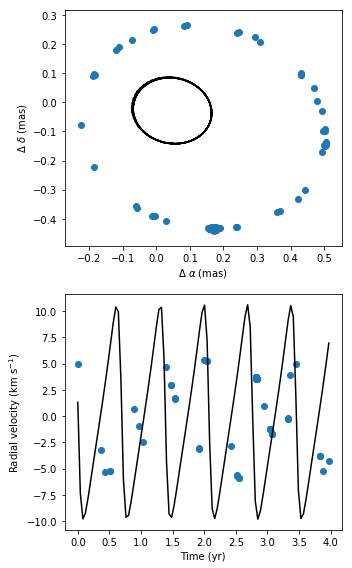

In [35]:
fig, ax = plt.subplots(2, 1, figsize=(5,8))

ax[0].scatter(obs_pos['ra']*3600.0*1.0e3, obs_pos['dec']*3600.0*1.0e3)

t_tmp = np.linspace(0.0, np.max(obs_pos['time']), 100)
ra, dec = orbit.get_ra_dec(p, t_tmp)
ax[0].plot(ra*3600.0*1.0e3, dec*3600.0*1.0e3, color='k')

ax[0].set_xlabel(r"$\Delta\ \alpha$ (mas)")
ax[0].set_ylabel(r"$\Delta\ \delta$ (mas)")





ax[1].scatter(obs_pos['time']/secyer, obs_pos['rv'])

rv = orbit.get_RV(p, t_tmp)
ax[1].plot(t_tmp/secyer, rv, color='k')

ax[1].set_xlabel("Time (yr)")
ax[1].set_ylabel("Radial velocity (km s$^{-1}$)")

plt.tight_layout()
plt.savefig("../figures/Eccentric_test_orbit.pdf")
# plt.show()